Importing dataset from local files

In [ ]:
from google.colab import files

Uploading dataset

In [ ]:
uploaded = files.upload()

Saving insurance.csv to insurance.csv


Loading the dataset, counting the number of duplicates and counting the no: of empty cells per column

In [ ]:
import pandas as pd

insurance = pd.read_csv('insurance.csv')

insurance.info()

print('\nNo: of Duplicates =>', insurance.duplicated().sum())


print('\nEmpty cells in each column:\n', insurance.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

No: of Duplicates => 1

Empty cells in each column:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


Now, removing the duplicate

In [ ]:
insurance.drop_duplicates(subset = None, keep = 'first', inplace = True)

**Training the Linear Model**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

model = LinearRegression()

encoded_insurance = pd.get_dummies(insurance, columns = ['sex', 'smoker', 'region'])

x = encoded_insurance.drop(['charges'], axis = 1)
y = encoded_insurance['charges']

Splitting the data as training and testing data

In [ ]:
X_train, x_test, Y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

Feeding the training data to the model

In [ ]:
model.fit(X_train, Y_train)

LinearRegression()

Predicting Insurance 'Charges'

In [ ]:
y_pred = model.predict(x_test)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 456.3820957086955
Coefficients: [   244.21362564    311.9651736     492.08135602    100.86270633
   -100.86270633 -11894.79640234  11894.79640234    632.31205034
    183.96148342   -360.78807438   -455.48545937]


**Visualizations**

Visualizing how BMI impacts insurance charges

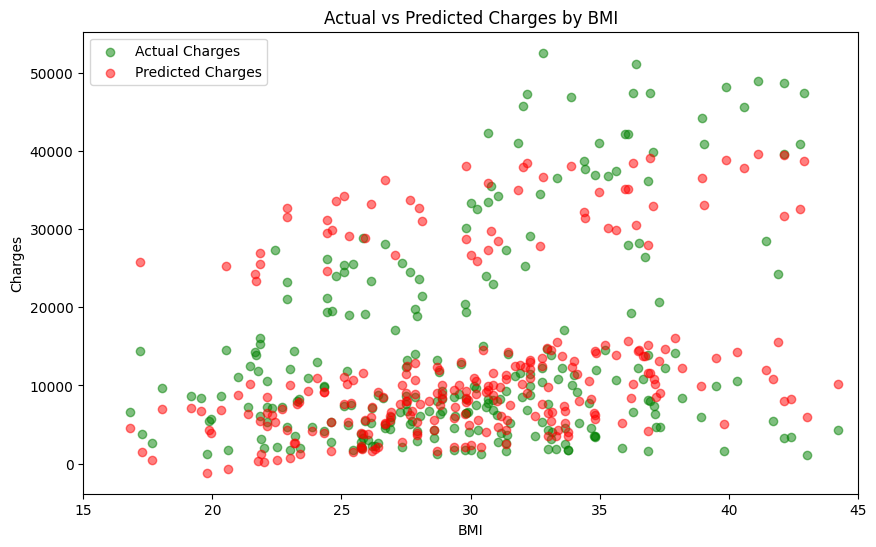

In [ ]:
bmi = x_test['bmi']

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.scatter(bmi, y_test, color='green', label='Actual Charges', alpha=0.5)
plt.scatter(bmi, y_pred, color='red', label='Predicted Charges', alpha=0.5)
plt.xlabel('BMI')
plt.xlim(15, 45)
plt.ylabel('Charges')
plt.title('Actual vs Predicted Charges by BMI')
plt.legend()
plt.show()

Visualizing how age impacts Insurance charges

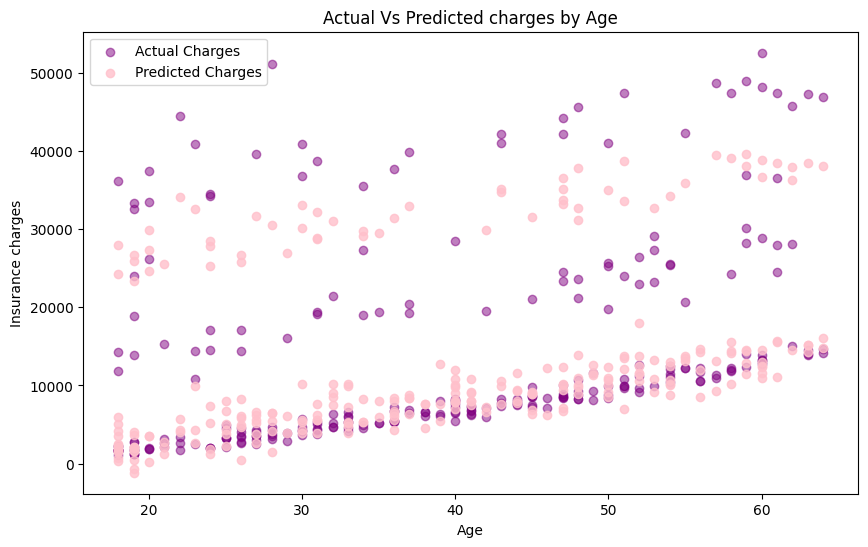

In [ ]:
age = x_test['age']

plt.figure(figsize = (10, 6))
plt.scatter(age, y_test, color = 'purple', label = 'Actual Charges', alpha = 0.5)
plt.scatter(age, y_pred, color = 'pink', label = 'Predicted Charges', alpha = 0.8)
plt.xlabel('Age')
plt.ylabel('Insurance charges')
plt.title('Actual Vs Predicted charges by Age')
plt.legend()
plt.show()

Visualizing how Smoker status impacts Insurance charges

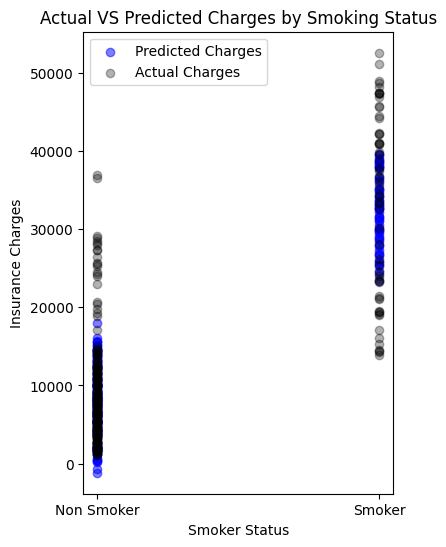

In [ ]:
# print(x_test.columns)
smoker_status = x_test['smoker_yes']

plt.figure(figsize = (4, 6))
plt.scatter(smoker_status, y_pred, color = 'blue', label = 'Predicted Charges', alpha = 0.5)
plt.scatter(smoker_status, y_test, color = 'black', label = 'Actual Charges', alpha = 0.3)
plt.xticks([0, 1], ['Non Smoker', 'Smoker'])
plt.xlabel('Smoker Status')
plt.ylabel('Insurance Charges')
plt.title('Actual VS Predicted Charges by Smoking Status')
plt.legend()
plt.show()

**Evalusting model by calculating its MAE and RMSE**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('Mean Absolute Error: ' , round(mae, 2))
print('Roor Mean Square Error: ', round(rmse, 2))


Mean Absolute Error:  4396.03
Roor Mean Square Error:  6445.64


**Problem Statement**

Estimate the medical insurance claim amount based on personal data

**Dataset understanding and Description**

This dataset is about the insurance charges an indidual has. This contains some personal information of those individuals along withe insurance amount that they have.

**Data Cleaning and Preparation**

Steps taken:
1. This dataset was already clean, it didn't have empty cell.
2. It just had one duplicated row which was dropped using drop_duplicates() of python.

**Exploratory Data Analysis (EDA)**

In this Project, I've made 3 graphs.
1. For representing how BMI effects insurance charges of a person
2. For representing how Age effexts insurance charges.
3. For their smoking status their insurance charges.

**Model Training and Testing**

Model and training was feeding it 80% data of the dataset and testing with the remaining 20% of the data.
Some data fields was encoded as they were non-numeric and to train the model it was necessary.

**Evaluation Metrics**

The Model was evelauted for its Mean absolute Error (MAE) and Root Mean Square Error (RMSE) by using scikit library's funtions specific to these metrics.

**Conslusion**

This task had me explore some new metrics to evaluate my model.
The insights gathered from this training testing model include:
  1. Both Actual and Predicted Insurances charges of smokers are more than non-smokers.
  2. The more the age, the more the insurance charges are for an individual of hte dataset.
  3. Individuals having BMI 30 and onwards have the highest Insurance Charges.